## Postest 6 Kb
_Model DNN_

In [40]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, layers, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [41]:
df = pd.read_csv("GlobalWeatherRepository.csv")
df.drop(
    columns=['country', 'location_name', 'timezone', 'last_updated_epoch', 'last_updated', 'wind_direction', 'sunrise', 'sunset', 'moonrise', 'moonset',
             'moon_phase', 'moon_illumination', 'feels_like_celsius', 'feels_like_fahrenheit'], inplace=True
)

In [42]:
col = ['condition_text']
le=LabelEncoder()
for i in col:
    df[i]=le.fit_transform(df[i])
df.head(10)

,latitude,longitude,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
0,34.52,69.18,28.8,83.8,19,7.2,11.5,74,1004.0,29.64,...,8.3,13.3,647.5,130.2,1.2,0.4,7.9,11.1,1,1
1,41.33,19.82,27.0,80.6,14,3.8,6.1,210,1006.0,29.71,...,7.4,11.9,433.9,104.4,3.6,1.8,28.2,29.6,2,3
2,36.76,3.05,28.0,82.4,14,8.1,13.0,240,1014.0,29.94,...,3.4,5.4,647.5,16.6,63.1,12.6,6.4,7.9,1,1
3,42.50,1.52,10.2,50.4,19,6.0,9.7,345,1015.0,29.97,...,7.4,11.9,190.3,68.0,0.2,0.2,0.5,0.8,1,1
4,-8.84,13.23,25.0,77.0,14,2.2,3.6,270,1016.0,30.00,...,3.6,5.8,2136.2,147.3,52.8,26.9,139.6,203.3,4,10
5,17.12,-61.85,29.0,84.2,6,9.4,15.1,90,1015.0,29.97,...,23.3,37.4,200.3,16.6,0.5,0.5,0.8,1.9,1,1
6,-34.59,-58.67,9.0,48.2,0,6.9,11.2,70,1023.0,30.21,...,8.5,13.7,270.4,18.8,10.7,1.3,2.1,3.5,1,1
7,40.18,44.51,31.0,87.8,14,5.6,9.0,170,1003.0,29.62,...,5.1,8.3,212.0,121.6,1.0,1.1,5.0,6.2,1,1
8,-35.28,149.22,13.0,55.4,0,9.4,15.1,10,1017.0,30.03,...,9.4,15.1,203.6,44.0,3.5,0.5,4.0,5.8,1,1
9,48.20,16.37,16.0,60.8,6,11.9,19.1,320,1005.0,29.68,...,16.1,25.9,320.4,30.0,29.1,13.0,13.1,14.9,1,2


In [43]:
x = df.drop("condition_text", axis=1)
y = df['condition_text']
# y.unique()


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [45]:
x

,latitude,longitude,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,...,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
0,34.52,69.18,28.8,83.8,7.2,11.5,74,1004.0,29.64,0.00,...,8.3,13.3,647.5,130.2,1.2,0.4,7.9,11.1,1,1
1,41.33,19.82,27.0,80.6,3.8,6.1,210,1006.0,29.71,0.00,...,7.4,11.9,433.9,104.4,3.6,1.8,28.2,29.6,2,3
2,36.76,3.05,28.0,82.4,8.1,13.0,240,1014.0,29.94,0.00,...,3.4,5.4,647.5,16.6,63.1,12.6,6.4,7.9,1,1
3,42.50,1.52,10.2,50.4,6.0,9.7,345,1015.0,29.97,0.00,...,7.4,11.9,190.3,68.0,0.2,0.2,0.5,0.8,1,1
4,-8.84,13.23,25.0,77.0,2.2,3.6,270,1016.0,30.00,0.00,...,3.6,5.8,2136.2,147.3,52.8,26.9,139.6,203.3,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5060,10.50,-66.92,29.0,84.2,5.6,9.0,70,1008.0,29.77,0.14,...,5.2,8.3,907.9,25.0,91.9,125.9,39.6,40.4,2,4
5061,21.03,105.85,27.0,80.6,4.3,6.8,60,1010.0,29.83,0.00,...,7.5,12.1,1348.5,0.0,32.6,21.0,65.1,78.7,3,9
5062,15.35,44.21,17.1,62.9,4.3,6.8,19,1014.0,29.95,0.00,...,8.5,13.7,168.6,50.8,5.6,8.5,31.4,114.4,2,3
5063,-15.42,28.28,22.1,71.8,7.6,12.2,70,1013.0,29.91,0.00,...,14.3,23.1,907.9,80.8,4.0,4.9,17.6,24.3,2,2


In [46]:
mm = MinMaxScaler()
mm.fit(X_train)
X_train_normalized = mm.transform(X_train)
X_test_normalized = mm.transform(X_test)

In [47]:
X_train.shape

(4052, 26)

In [48]:
model = Sequential([
    layers.Dense(32, input_shape=[26], activation='relu'),
    layers.Dense(64, activation='relu'),
    # layers.Dense(2, activation='softmax')
    layers.Dense(22, activation='softmax')
])

In [49]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [50]:
es = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1,
    restore_best_weights = True
)

In [51]:
history = model.fit(X_train_normalized, y_train, epochs=1000, validation_split=0.2, verbose=1, callbacks=[es])

Epoch 1/1000


102/102 [==============================] - 1s 3ms/step - loss: 2.1297 - accuracy: 0.4474 - val_loss: 1.4350 - val_accuracy: 0.6720
Epoch 2/1000
102/102 [==============================] - 0s 2ms/step - loss: 1.2966 - accuracy: 0.6868 - val_loss: 1.0520 - val_accuracy: 0.7349
Epoch 3/1000
102/102 [==============================] - 0s 2ms/step - loss: 1.0321 - accuracy: 0.7346 - val_loss: 0.9050 - val_accuracy: 0.7805
Epoch 4/1000
102/102 [==============================] - 0s 2ms/step - loss: 0.9059 - accuracy: 0.7757 - val_loss: 0.8116 - val_accuracy: 0.7867
Epoch 5/1000
102/102 [==============================] - 0s 2ms/step - loss: 0.8449 - accuracy: 0.7883 - val_loss: 0.7570 - val_accuracy: 0.7953
Epoch 6/1000
102/102 [==============================] - 0s 2ms/step - loss: 0.8100 - accuracy: 0.7954 - val_loss: 0.7566 - val_accuracy: 0.8126
Epoch 7/1000
102/102 [==============================] - 0s 2ms/step - loss: 0.7878 - accuracy: 0.8010 - val_loss: 0.7283 - val_accuracy: 0.8089
Epoch

In [52]:
# Menjalankan evaluasi model pada data pengujian
hasil_evaluasi = model.evaluate(X_test_normalized, y_test)

# Mendapatkan akurasi dari hasil evaluasi (contoh)
akurasi = hasil_evaluasi[1] * 100  # Indeks 1 mewakili akurasi

# Menampilkan hasil evaluasi dalam bentuk persen
print(f'Akurasi: {akurasi:.2f}%')


32/32 [==============================] - 0s 1ms/step - loss: 0.7646 - accuracy: 0.8233
Akurasi: 82.33%


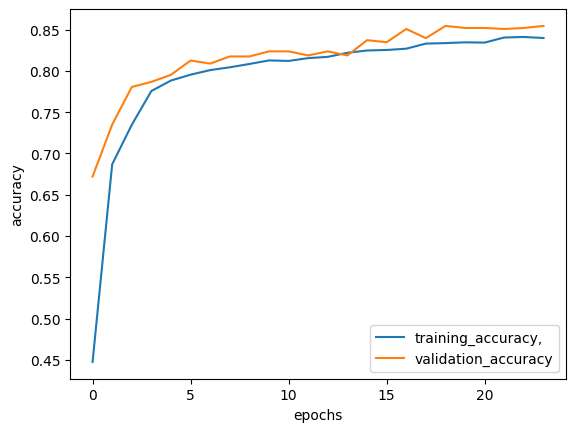

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training_accuracy,','validation_accuracy'])
plt.show()